# 第一讲：线性方程组的几何解释



n线性等式，n个未知数


## 二元方程组

线性方程组的表示形式

$$\begin{cases}2x-y=0\\-x+2y=3\end{cases}$$

可以表示成矩阵及向量形式： 

$$\begin{bmatrix}2&-1\\-1&2\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$$

我们用矩阵$A$代表未知数的系数，用$x$代表未知数向量，用$b$代表等号右边的常数向量，则通式为：

$$
Ax=b
$$

### 行视角 Row picture

即直角坐标系中的图像。

[matplotlib用法](https://lmandsl.gitee.io/docs/datawhale/#/docs/fantastic-matplotlib_29)
[seaborn 0.9 中文文档](https://seaborn.apachecn.org/#/)

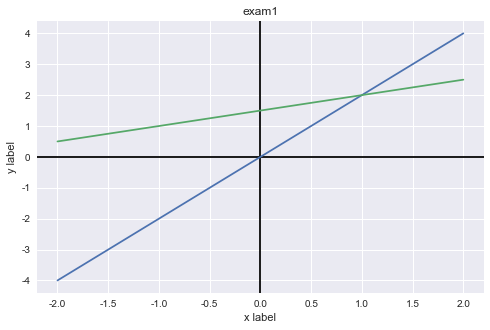

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号
x = np.linspace(-2, 2, 50)
#
y1 = 2*x
y2 = 0.5*(3+x)



fig=plt.figure(num=3, figsize=(8, 5))
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('exam1')
plt.plot(x, y1)
plt.plot(x, y2)
plt.style.use('seaborn')
plt.draw()


In [24]:
plt.close(fig)

上图是我们都很熟悉的直角坐标系中的两直线相交的情况

### 列视角 Column picture

上面的方程组写成列向量的线性组合:

$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$

第一个列向量：$col_1$，第二个列向量：$col_2$

要使得式子成立，需要第一个向量加上`两倍`的第二个向量，即

$
1\begin{bmatrix}2\\-1\end{bmatrix}+2\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}
$

现在来看列图像，在二维平面上画出上面的列向量：

偏函数：[`functools.partial`]((https://www.runoob.com/w3cnote/python-partial.html))

向量箭头：[`pyplot.arrow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html)

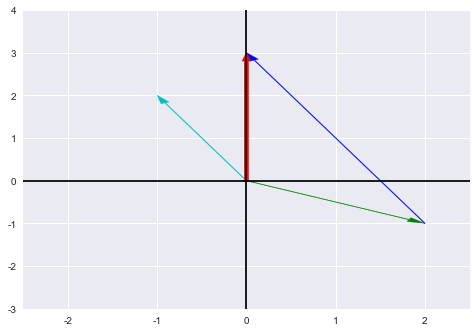

In [39]:
from functools import partial

fig = plt.figure()
plt.axhline(y=0,c='black')
plt.axvline(x=0,c='black')
ax = plt.gca()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-3, 4)

arrow_vector = partial(plt.arrow, width=0.01, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 2, -1,color='g')
arrow_vector(0, 0, -1, 2,color='c')
arrow_vector(2,-1,-2,4,color='b')
arrow_vector(0,0,0,3,width=0.05,color='r')
plt.draw()

In [37]:
plt.close(fig)

上图蓝色箭向量是 $2 ×\begin{bmatrix}-1\\2\end{bmatrix}$（两倍的蓝绿向量$col_2$），  绿向量$col_1$与蓝向量的向量和就是红向量$b$。

可以看出最后的结果为：

$$
1\times\begin{bmatrix}2\\-1\end{bmatrix}+2\times\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}
$$

接着，我们继续观察$x\begin{bmatrix}2\\-1\end{bmatrix}+y\begin{bmatrix}-1\\2\end{bmatrix}=\begin{bmatrix}0\\3\end{bmatrix}$，
$col_1,col_2$的某种线性组合得到了向量$b$，那么$col_1,col_2$的所有线性组合能够得到什么结果？它们将铺满整个平面。

python实现方程组解

In [41]:
from scipy import linalg
import numpy as np
a = np.array([[2,-1],[-1,2]])
b = np.array([0,3])
x = linalg.solve(a,b)
print(x)

[1. 2.]


## 三元方程组

考虑三个等式和三个未知数的情况，方程组如下：

$$\begin{cases}2x-y=0\\-x+2y-z=-1\\-3y+4z=4\end{cases}$$

可写矩阵形式：
$$A = \begin{bmatrix}2&-1&0\\-1&2&-1\\0&-3&4\end{bmatrix},\theta(避免跟系数x重名)=\begin{bmatrix}x\\y\\z\end{bmatrix},b=\begin{bmatrix}0\\-1\\4\end{bmatrix}$$


**行视角**

每个等式在三维坐标系中都组成一个二维平面，两个平面如果相交，会交汇于一条直线。三个平面如果不存在平行情况，会相交于一点，即是方程组的解。

**列视角**

方程组列向量的线性组合形式：
$$
x\begin{bmatrix}2\\-1\\0\end{bmatrix} + y\begin{bmatrix}-1\\2\\-3\end{bmatrix} + z\begin{bmatrix}0\\-1\\4\end{bmatrix} = \begin{bmatrix}0\\-1\\4\end{bmatrix}
$$

很容易看出当`$x=0, y=0, z=1$`时，上述的线性组合满足要求。

In [47]:
from scipy import linalg
import numpy as np
a = np.array([[2,-1,0],[-1,2,-1],[0,-3,4]])
b = np.array([0,-1,4])
x = linalg.solve(a,b)
print(x)

[ 0. -0.  1.]


## 推广

对于$Ax=b$，对于任意向量$b$是否存在向量$x$使等式成立？

根据列视角，这个问题等于，A矩阵的列的线性组合能否覆盖整个三维向量空间？

更普遍的对于$n$维空间内的实数矩阵$A$，我们可以记为$b \in R^{n×n}$，是否可以对$A$的列进行任意的线性组合，使得结果填满整个n维空间？

### 二维情况

按照列视角来看，如果A的列向量都在同一条直线上，那么它们的线性组合也都会在这条直线上，永远无法填满整个二维平面。

如果我们将二维情况的矩阵$A$计为$[v1,v2]$,例如当

$$
A = \begin{bmatrix}1&3\\-2&-6\end{bmatrix}
$$

时，我们有，

$$
v1 = \begin{bmatrix}1\\-2\end{bmatrix}, v2=\begin{bmatrix}3\\-6\end{bmatrix}
$$

那么，如果$v1 = k × v2,k \in R$时，无法填满平面。

### 高维情况

推广到三维的情况，如果A的列向量都在同一个二维平面上，那么它们的线性组合也都会在这个平面上，永远无法填满整个三维空间。

即如果$v1 = k1×v2 + k2 × v3 ,k1,k2 \in R$时，无法满足。

更一般的，如果$A$矩阵的列向量不是独立的，其中的某个列是其他列的线性组合的话，上述问题不成立。



### 矩阵与向量乘积的列视角

使用列视角的方式来看矩阵与向量的乘积，即$Ax = b$中的$Ax:$

$$
\begin{bmatrix}2&5\\1&3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix} = 1 × \begin{bmatrix}2\\1\end{bmatrix} + 2 × \begin{bmatrix}5\\3\end{bmatrix}
= \begin{bmatrix}12\\7\end{bmatrix}
$$

如果按照行视角来考虑，那么将会是$A$矩阵的行与向量进行点积之后的结果：



In [54]:
import numpy as np
A = np.array([[2, 5], [1, 3]])
x = np.array([1, 2])

np.array([A[0].dot(x), A[1].dot(x)])

array([12,  7])

### 方程组矩阵形式Ax=b（一种乘法运算）

举个例子，如何计算矩阵乘以向量:

$$A = \begin{bmatrix}2&5\\1&3\end{bmatrix},x=\begin{bmatrix}1\\2\end{bmatrix}$$

列向量线性组合，一次计算一列
$$
\begin{bmatrix}2&5\\1&3\end{bmatrix}\begin{bmatrix}1\\2\end{bmatrix}=1\begin{bmatrix}2\\1\end{bmatrix}+2\begin{bmatrix}5\\3\end{bmatrix}=\begin{bmatrix}12\\7\end{bmatrix}
$$

向量内积，矩阵第一行向量点乘x向量
$$
\begin{bmatrix}2&5\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=12,\ \begin{bmatrix}1&3\end{bmatrix}\cdot\begin{bmatrix}1&2\end{bmatrix}^T=7
$$


课程建议使用第一种方法，将$Ax$看做$A$列向量的线性组合。

## 其他资料

1. [向量的线性表示、线性相关、线性无关](https://zhuanlan.zhihu.com/p/32986536)
2. [线性代数笔记](https://github.com/wangyingsm/linear-algebra-notes/blob/master/lecture1.basic_concepts.ipynb)

## 习题

【题1】 找到一个x的组合(非0组合)，使 $x_1w_1 + x_2w_2 + x_3w_3$ 的结果为0向量

$
w_1 = \begin{bmatrix}1\\2\\3\end{bmatrix} 
w_2 = \begin{bmatrix}4\\5\\6\end{bmatrix} 
w_3 = \begin{bmatrix}7\\8\\9\end{bmatrix} 
$

【题2】求解矩阵乘法：$\begin{bmatrix}1&2&0\\2&0&3\\4&1&1\end{bmatrix}$

【题3】 判断：一个 3x2 矩阵 乘 3x2 矩阵 是一个 3x3矩阵，如果是假的话，写一个类似这个的正确表达